In [ ]:
from venv.lib.python import numpy as np
from venv.lib.python import matplotlib.pyplot as plt 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [ ]:
filnavn = 'table (1).csv' 
#data = np.genfromtxt(filnavn, delimiter=';', skip_header=1)  # Use skip_header=1 to skip the header row if there is one
data = pd.read_csv(filnavn, delimiter=';')
print(data.head()) #sjekker at dataen er formatert som ønsket. 
 

                   Navn  Stasjon Tid(norsk normaltid) Nedbør (10 min)  \
0  Trondheim - Granåsen  SN68090     05.03.2025 01:00             0,1   
1  Trondheim - Granåsen  SN68090     05.03.2025 01:10             0,3   
2  Trondheim - Granåsen  SN68090     05.03.2025 01:20             0,2   
3  Trondheim - Granåsen  SN68090     05.03.2025 01:30             0,1   
4  Trondheim - Granåsen  SN68090     05.03.2025 01:40             0,4   

  Lufttemperatur  
0            3,1  
1              3  
2            3,2  
3              3  
4            2,9  


In [76]:
# Sjekke for manglende verdier
if isinstance(data, pd.DataFrame):
	print(data.isnull().sum())
else:
	print("Data is not a DataFrame")

# Konvertere 'Tid(norsk normaltid)' til datetime-format
data['Tid(norsk normaltid)'] = pd.to_datetime(data['Tid(norsk normaltid)'], format='%d.%m.%Y %H:%M')

# Sjekke datatyper
print(data.dtypes)

Navn                    0
Stasjon                 1
Tid(norsk normaltid)    1
Nedbør (10 min)         1
Lufttemperatur          1
dtype: int64
Navn                            object
Stasjon                         object
Tid(norsk normaltid)    datetime64[ns]
Nedbør (10 min)                 object
Lufttemperatur                  object
dtype: object


In [77]:
# Konvertere 'Nedbør (10 min)' og 'Lufttemperatur' til numeriske verdier
data['Nedbør (10 min)'] = data['Nedbør (10 min)'].str.replace(',', '.').astype(float)
data['Lufttemperatur'] = data['Lufttemperatur'].str.replace(',', '.').astype(float)

# Grunnleggende statistikk for numeriske kolonner
print(data.describe())

# Gjennomsnittlig temperatur og nedbør per time
data['Time'] = data['Tid(norsk normaltid)'].dt.hour
hourly_avg = data.groupby('Time').agg({'Lufttemperatur': 'mean', 'Nedbør (10 min)': 'mean'})
print(hourly_avg)

       Nedbør (10 min)  Lufttemperatur
count       288.000000      288.000000
mean          0.088194        3.889583
std           0.162942        2.422347
min           0.000000        0.100000
25%           0.000000        1.900000
50%           0.000000        2.900000
75%           0.100000        5.700000
max           1.100000        9.100000
      Lufttemperatur  Nedbør (10 min)
Time                                 
0.0         3.725000         0.033333
1.0         4.675000         0.108333
2.0         3.775000         0.058333
3.0         5.008333         0.000000
4.0         5.550000         0.016667
5.0         5.041667         0.000000
6.0         4.591667         0.000000
7.0         4.650000         0.016667
8.0         4.633333         0.050000
9.0         4.450000         0.041667
10.0        4.241667         0.100000
11.0        4.216667         0.075000
12.0        4.233333         0.066667
13.0        3.908333         0.066667
14.0        3.608333         0.058333
15.

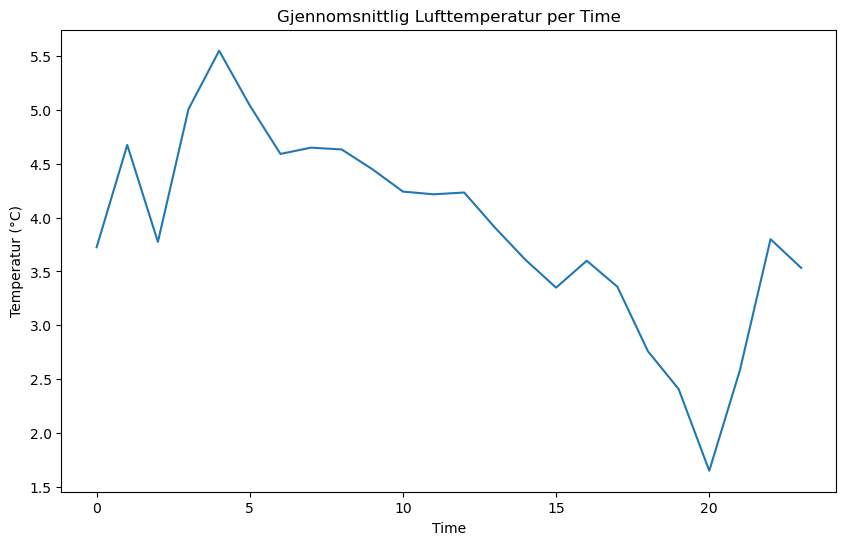

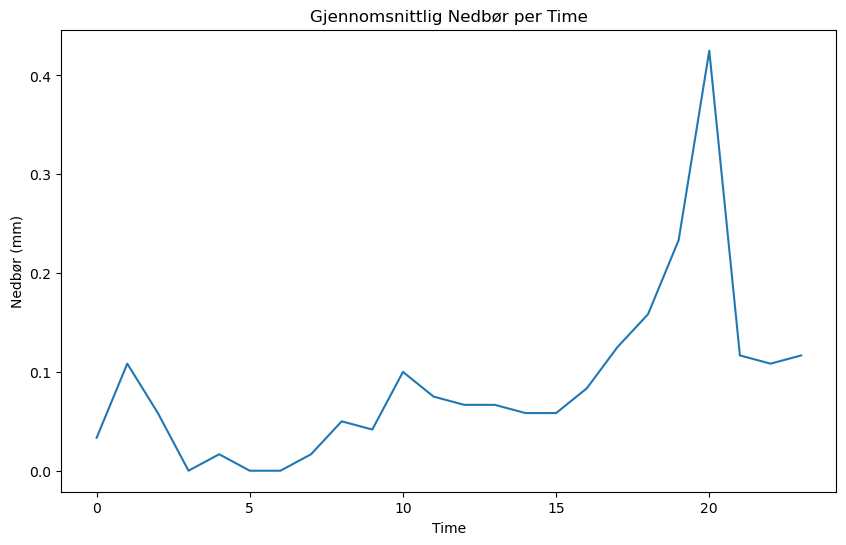

In [78]:
import seaborn as sns

# Plotte gjennomsnittlig temperatur per time
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg['Lufttemperatur'])
plt.title('Gjennomsnittlig Lufttemperatur per Time')
plt.xlabel('Time')
plt.ylabel('Temperatur (°C)')
plt.show()

# Plotte gjennomsnittlig nedbør per time
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg['Nedbør (10 min)'])
plt.title('Gjennomsnittlig Nedbør per Time')
plt.xlabel('Time')
plt.ylabel('Nedbør (mm)')
plt.show()